<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/Analise_exploratioria_de_dados/blob/main/Analise_Explorat%C3%B3ria_de_dados_Estudo_de_Intelig%C3%AAncia_de_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Inteligência de Mercado

*A rotatividade (churn) de clientes ocorre quando clientes ou assinantes param de fazer negócios com uma empresa ou serviço. Também é conhecido como perda de clientes ou taxa de cancelamento.
Um um sistema onde clientes fazem cotações diariamente, prever as taxas de cancelamento é particularmente útil.
Neste projeto, vamos prever a rotatividade (churn) de clientes usando um conjunto de dados de compras.
Usaremos a regressão logística, a árvore de decisão e a floresta aleatória como modelos de Machine Learning.*
Usaremos um dataset oferecido por uma empresa que faz cotação com fornecedores.
Cada linha representa um cliente e cada coluna contém os atributos desse cliente.* *texto em itálico*

In [63]:
# Carregando a biblioteca dplyr
library(dplyr)
library(tidyr)
library(ggplot2)
library(caret)

Loading required package: lattice



In [62]:
# Carregar a biblioteca caret
install.packages("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
#Leitura dos dados
library(readxl)
churn <-read_excel("/churn.xlsx")
View(churn)

CLIENTE,DATA_EMISSAO,DATA_HOJE,DIAS SEM COTAR,Convites,Respostas,Declinadas,faltam_responder,ESTADO
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
14841,2020-09-27,2022-12-30,824,8,3,3,5,SP
22530,2020-09-27,2022-12-30,824,4,0,0,4,SP
22530,2020-09-27,2022-12-30,824,10,3,2,7,SP
426,2020-09-28,2022-12-30,823,15,5,3,10,SP
426,2020-09-28,2022-12-30,823,13,5,2,8,SP
426,2020-09-28,2022-12-30,823,13,3,2,10,SP
426,2020-09-28,2022-12-30,823,14,4,3,10,SP
426,2020-09-28,2022-12-30,823,14,7,5,7,SP
426,2020-09-28,2022-12-30,823,13,7,4,6,SP


# Nova seção

In [13]:
# Usamos sapply para verificar o número de valores ausentes (missing) em cada coluna.
# Descobrimos que há 11 valores ausentes nas colunas "TotalCharges".
# Então, vamos remover todas as linhas com valores ausentes.
sapply(churn, function(x) sum(is.na(x)))
churn <- churn[complete.cases(churn), ]

CLIENTE     DATA_EMISSAO        DATA_HOJE   DIAS SEM COTAR 
               0                0                0                0 
        Convites        Respostas       Declinadas faltam_responder 
               0                0                0                0 
          ESTADO 
               0

In [14]:
# Olhe para as variáveis, podemos ver que temos algumas limpezas e ajustes para fazer.
# Vamos mudar o nome de algumas variaveis
# Alterando os nomes das variáveis
names(churn) <- c("Cliente", "Data_cotacao", "Data_hoje", "Dias_sem_Cotacao",
                  "Convites", "Respostas", "Declinadas", "Faltam_Responder", "Estado")

# Verificando as alterações
print(names(churn))

[1] "Cliente"          "Data_cotacao"     "Data_hoje"        "Dias_sem_Cotacao"
[5] "Convites"         "Respostas"        "Declinadas"       "Faltam_Responder"
[9] "Estado"          


In [15]:
# Criando o vetor de dias sem cotação
dias_sem_cotacao <- c(15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 320)

# Definindo os limites das faixas
limites <- c(0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, Inf)

# Criando a variável com as faixas de dias
faixas <- cut(dias_sem_cotacao, breaks = limites, labels = c("0-30", "31-60", "61-90", "91-120", "121-150",
                                                             "151-180", "181-210", "211-240", "241-270",
                                                             "271-300", ">300"))

# Verificando o número de linhas do dataset de churn
num_linhas <- nrow(churn)

# Replicando o vetor de faixas para ter o mesmo número de linhas do dataset
faixas_replicadas <- rep(faixas, length.out = num_linhas)

# Adicionando a variável faixas ao dataset de churn
churn <- churn %>%
  mutate(Faixas_Dias_Sem_Cotacao = faixas_replicadas)

# Exibindo o dataset com a variável faixas
churn


Cliente,Data_cotacao,Data_hoje,Dias_sem_Cotacao,Convites,Respostas,Declinadas,Faltam_Responder,Estado,Faixas_Dias_Sem_Cotacao
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
14841,2020-09-27,2022-12-30,824,8,3,3,5,SP,0-30
22530,2020-09-27,2022-12-30,824,4,0,0,4,SP,31-60
22530,2020-09-27,2022-12-30,824,10,3,2,7,SP,61-90
426,2020-09-28,2022-12-30,823,15,5,3,10,SP,91-120
426,2020-09-28,2022-12-30,823,13,5,2,8,SP,121-150
426,2020-09-28,2022-12-30,823,13,3,2,10,SP,151-180
426,2020-09-28,2022-12-30,823,14,4,3,10,SP,181-210
426,2020-09-28,2022-12-30,823,14,7,5,7,SP,211-240
426,2020-09-28,2022-12-30,823,13,7,4,6,SP,241-270


In [16]:
# Criando a tabela agrupada por estado
tabela_agrupada <- aggregate(cbind(Dias_sem_Cotacao, Convites, Respostas, Declinadas, Faltam_Responder) ~ Estado, churn, sum)

# Exibindo a tabela agrupada
tabela_agrupada


Estado,Dias_sem_Cotacao,Convites,Respostas,Declinadas,Faltam_Responder
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AC,156,41,21,13,20
AL,8739,1369,976,584,393
AM,10228,539,333,186,206
BA,549015,12768,7143,3280,5625
CE,12453,444,271,154,173
DF,11981,620,438,252,182
ES,17975,664,438,203,226
GO,101723,3165,1977,1036,1188
MA,4675,264,177,101,87


In [17]:
# Criando uma nova coluna "Região" no dataframe "churn"
churn <- churn %>%
  mutate(Região = case_when(
    Estado %in% c("AC", "AM", "AP", "PA", "RO", "RR", "TO") ~ "Norte",
    Estado %in% c("AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE") ~ "Nordeste",
    Estado %in% c("ES", "MG", "RJ", "SP") ~ "Sudeste",
    Estado %in% c("PR", "RS", "SC") ~ "Sul",
    Estado %in% c("GO", "MT", "MS") ~ "Centro-Oeste",
    TRUE ~ "Outra Região"
  ))
churn

Cliente,Data_cotacao,Data_hoje,Dias_sem_Cotacao,Convites,Respostas,Declinadas,Faltam_Responder,Estado,Faixas_Dias_Sem_Cotacao,Região
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>
14841,2020-09-27,2022-12-30,824,8,3,3,5,SP,0-30,Sudeste
22530,2020-09-27,2022-12-30,824,4,0,0,4,SP,31-60,Sudeste
22530,2020-09-27,2022-12-30,824,10,3,2,7,SP,61-90,Sudeste
426,2020-09-28,2022-12-30,823,15,5,3,10,SP,91-120,Sudeste
426,2020-09-28,2022-12-30,823,13,5,2,8,SP,121-150,Sudeste
426,2020-09-28,2022-12-30,823,13,3,2,10,SP,151-180,Sudeste
426,2020-09-28,2022-12-30,823,14,4,3,10,SP,181-210,Sudeste
426,2020-09-28,2022-12-30,823,14,7,5,7,SP,211-240,Sudeste
426,2020-09-28,2022-12-30,823,13,7,4,6,SP,241-270,Sudeste


In [18]:
# Criando a tabela agrupada e ordenada
tabela_agrupada <- churn %>%
  group_by(Estado) %>%
  summarise(Dias_sem_Cotacao = sum(Dias_sem_Cotacao),
            Convites = sum(Convites),
            Respostas = sum(Respostas),
            Declinadas = sum(Declinadas),
            Faltam_Responder = sum(Faltam_Responder)) %>%
  arrange(Dias_sem_Cotacao)

# Exibindo todas as 25 linhas da tabela agrupada
print(tabela_agrupada, n = 25)


# A tibble: 25 × 6
   Estado Dias_sem_Cotacao Convites Respostas Declinadas Faltam_Responder
   <chr>             <dbl>    <dbl>     <dbl>      <dbl>            <dbl>
 1 RR                   59       15        11          8                4
 2 AC                  156       41        21         13               20
 3 PI                  156       14         8          3                6
 4 PB                 2304      207       141         80               66
 5 RN                 2560       91        50         21               41
 6 TO                 3174      190       126         48               64
 7 MA                 4675      264       177        101               87
 8 AL                 8739     1369       976        584              393
 9 AM                10228      539       333        186              206
10 SE                11974      749       470        236              279
11 DF                11981      620       438        252              182
12 CE              

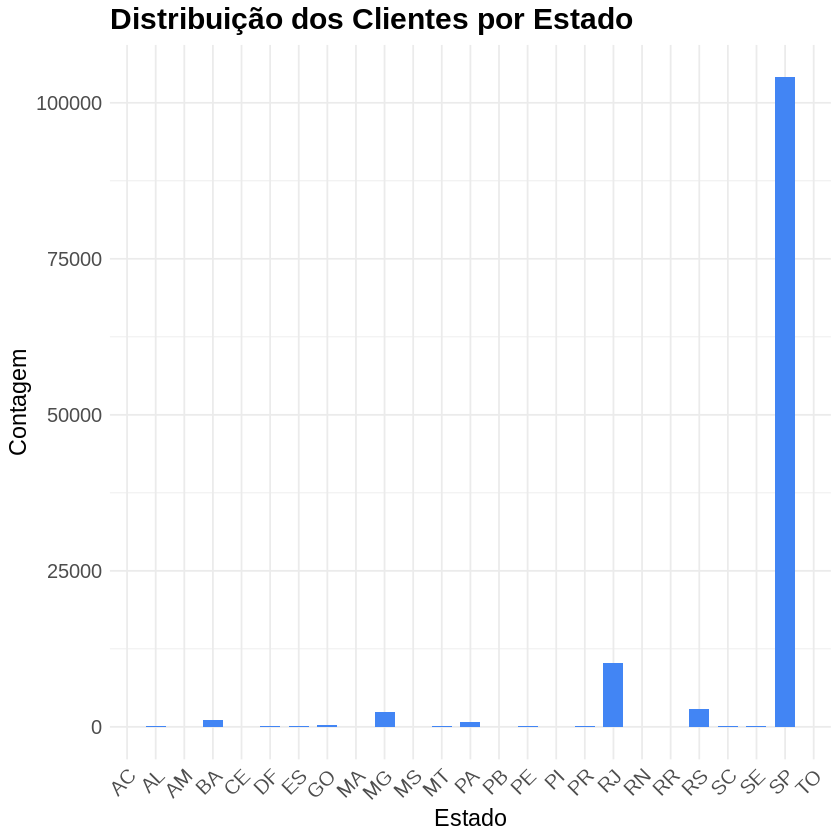

In [19]:
# Criando o gráfico de barras personalizado
grafico <- ggplot(churn, aes(x = Estado)) +
  geom_bar(fill = "#4285F4",  width = 0.7, alpha = 1.9) +
  labs(title = "Distribuição dos Clientes por Estado", x = "Estado", y = "Contagem") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(angle = 45, hjust = 1))

# Exibindo o gráfico personalizado
print(grafico)


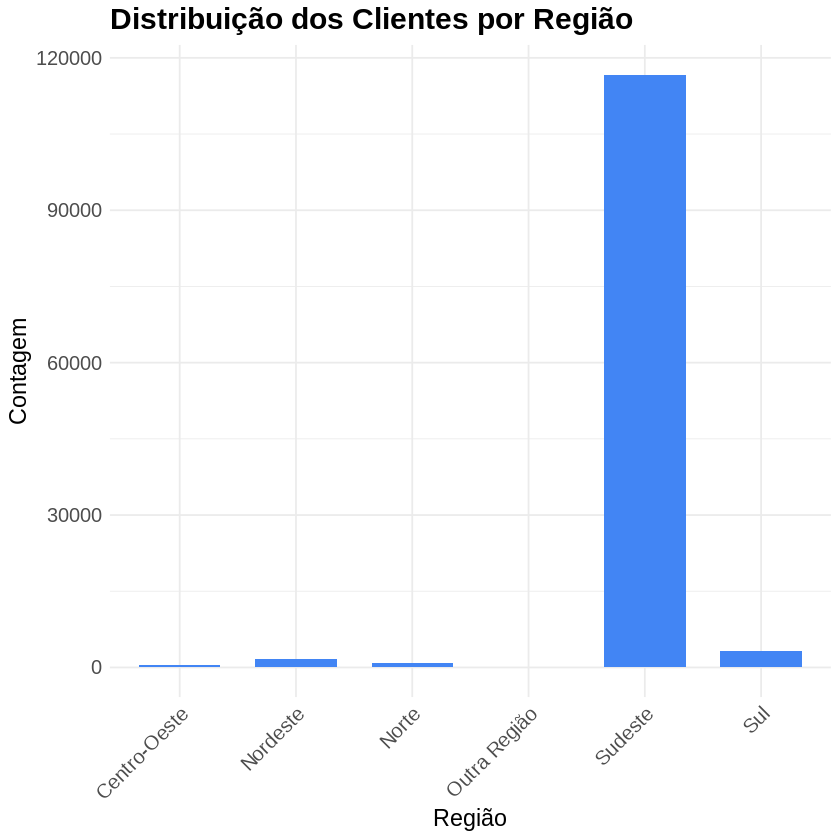

In [20]:
# Criando o gráfico de barras personalizado
grafico <- ggplot(churn, aes(x = Região)) +
  geom_bar(fill = "#4285F4", width = 0.7, alpha = 1.9) +
  labs(title = "Distribuição dos Clientes por Região", x = "Região", y = "Contagem") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(angle = 45, hjust = 1))

# Exibindo o gráfico personalizado
print(grafico)

# Nesta etapa, vou anexar algumas imagens de análises que foram feitas no Excel.
*A ideia é trazer uma comparação entre os anos de 2021 e 2022. No entanto, devido à falta de atualização da base de dados, não possuo informações referentes ao segundo trimestre de 2022.*

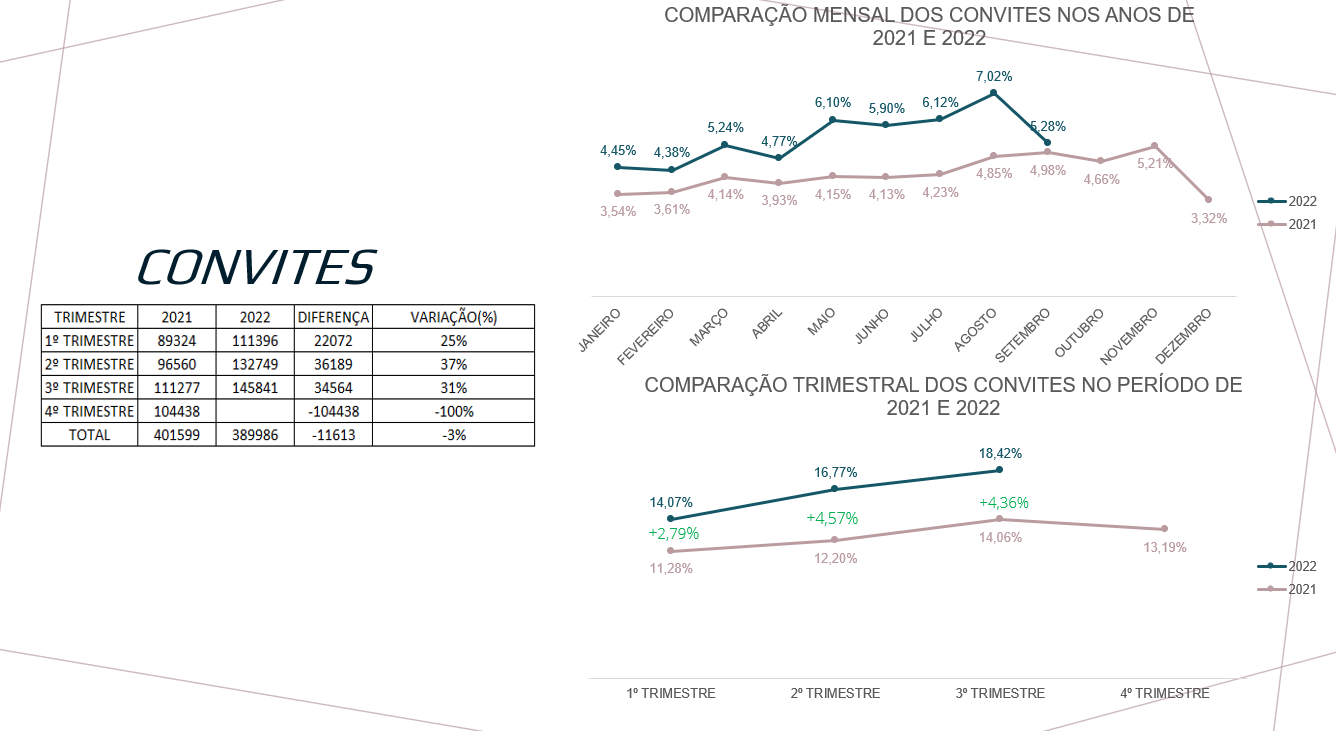

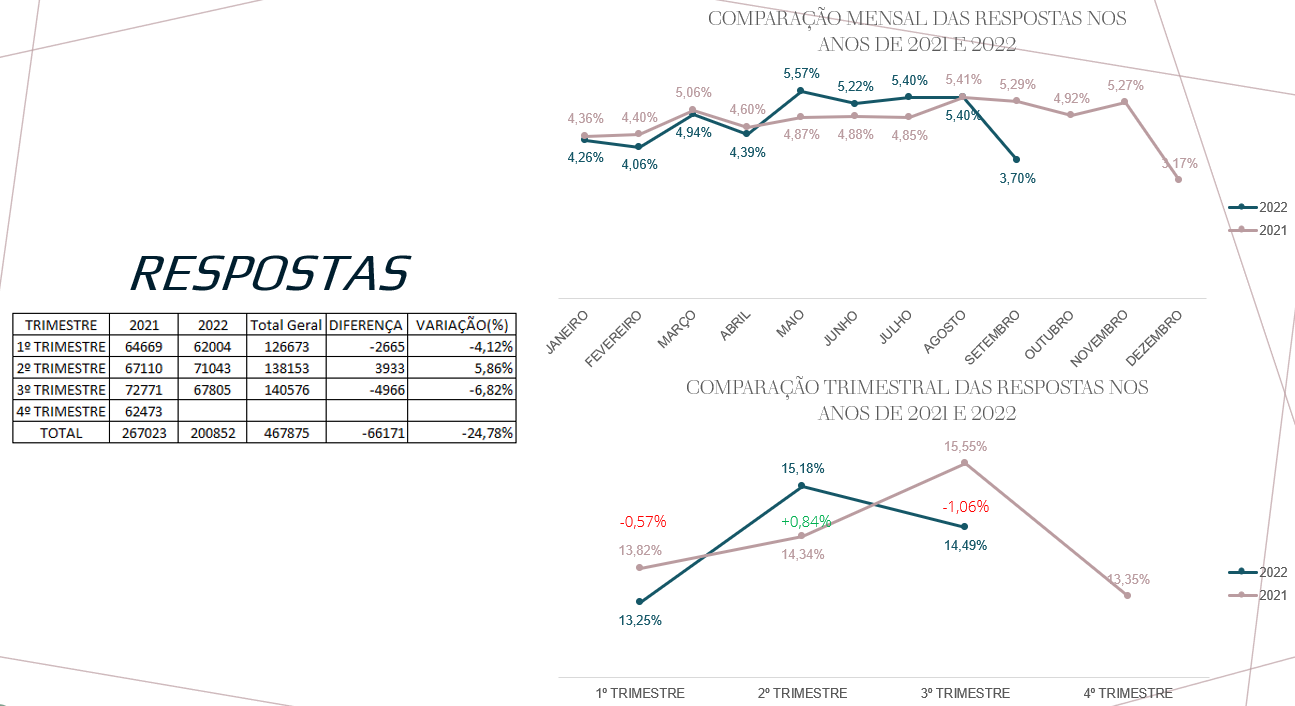

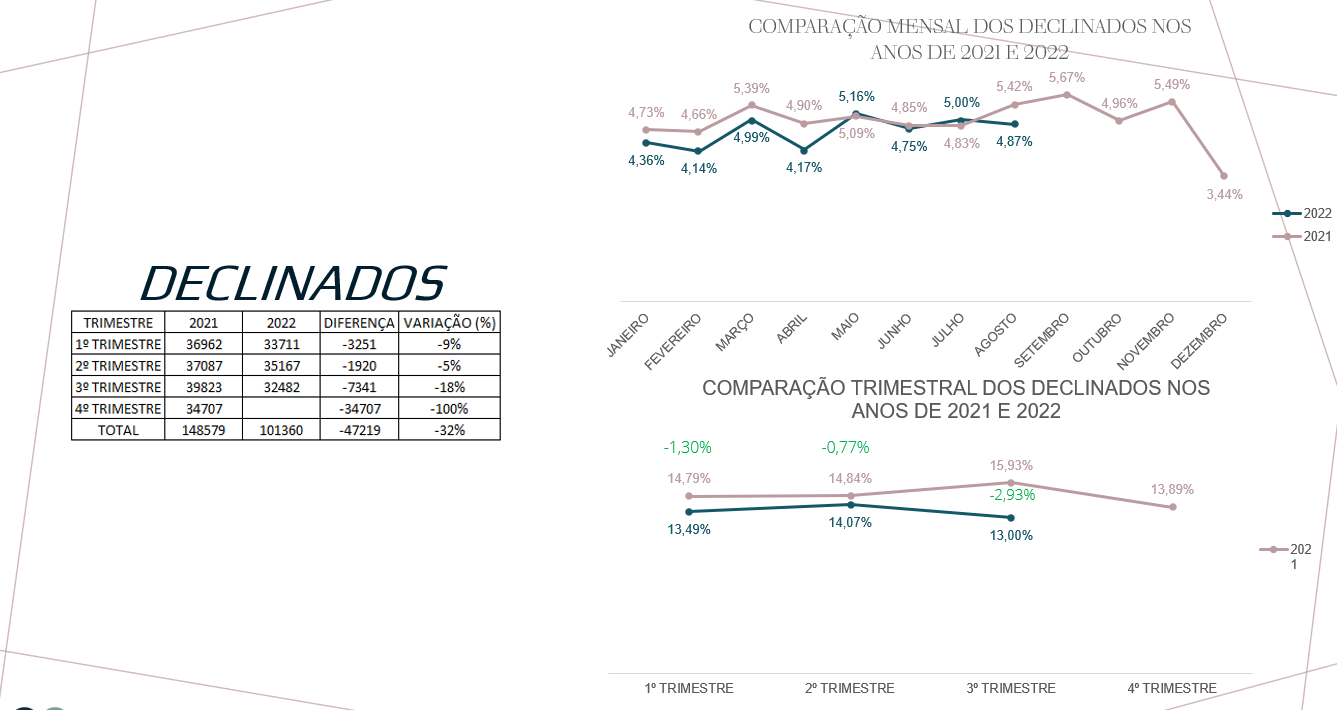

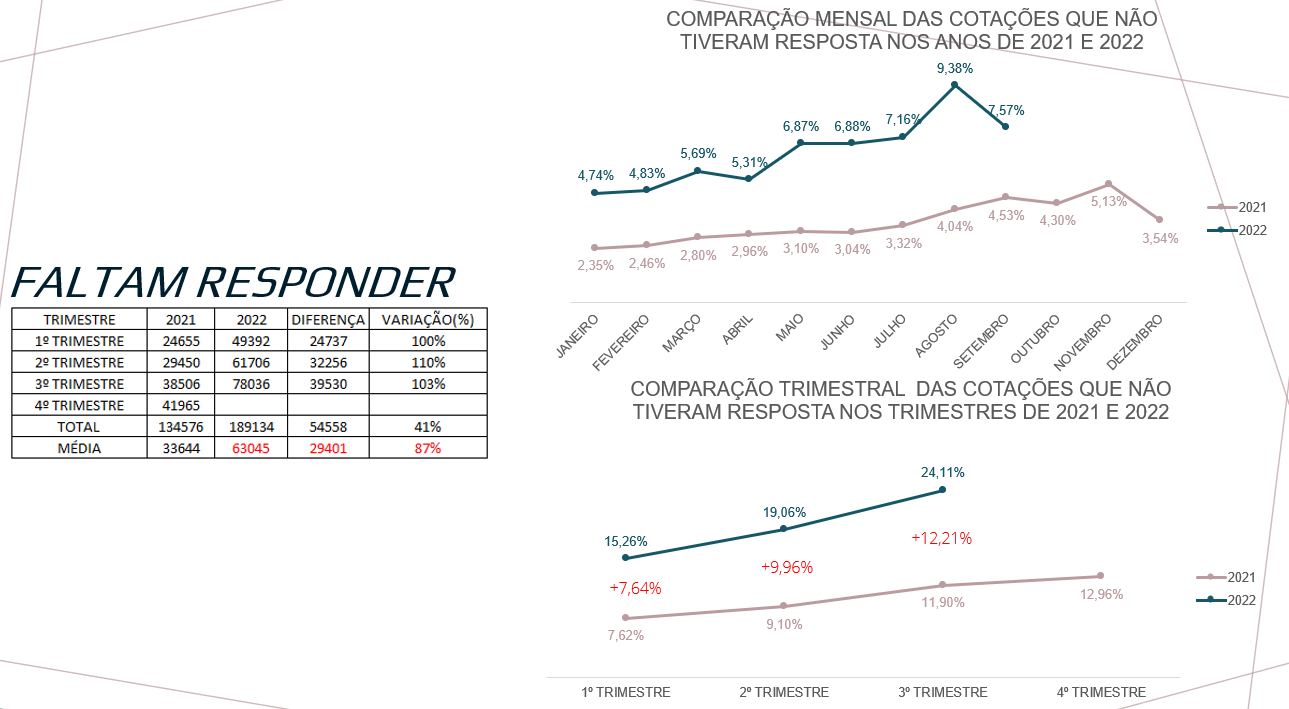

#Na proxima analise exploratória, vamos entender o comportamento dos clientes.
*Temos os cliente que entraram em 2020, 21 e 22.
Vamos entender a quanto tempo esses cliente estão sem fazer uma cotação na plataforma.*  

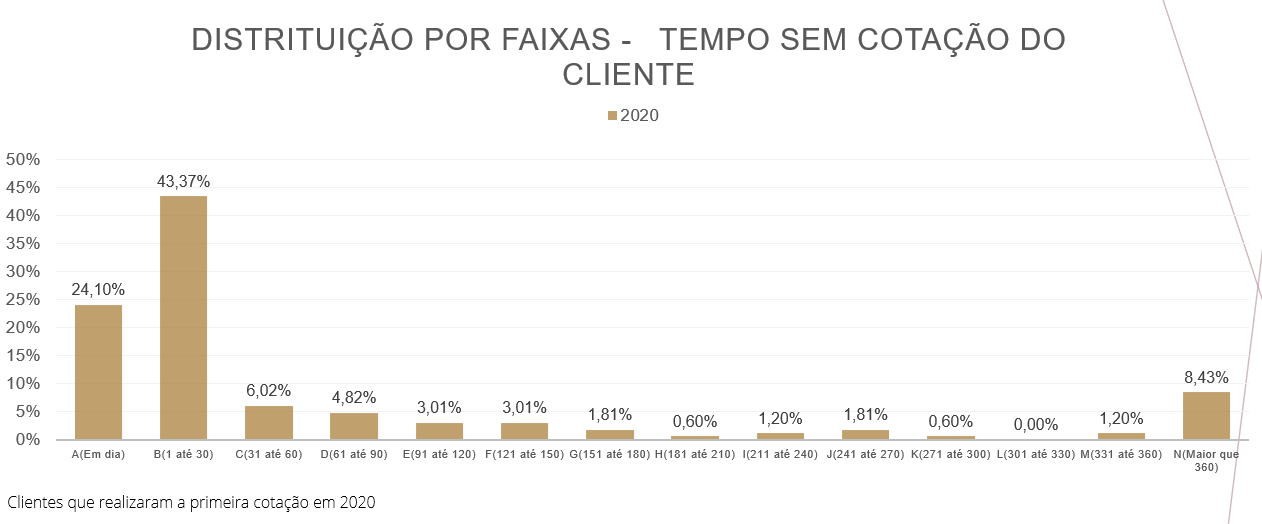

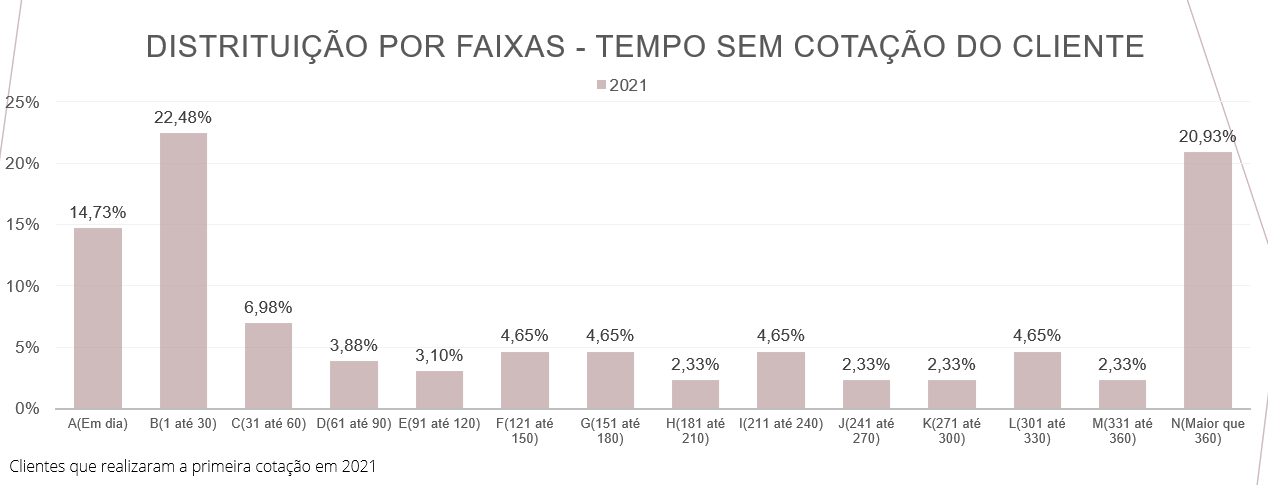

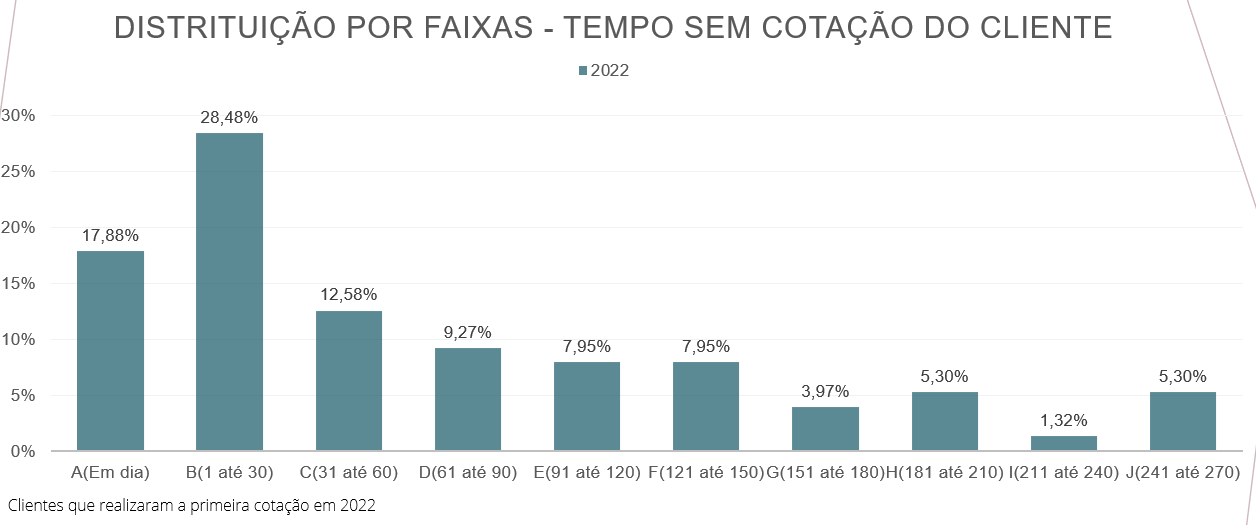

# Análise Descritiva

In [21]:
# Resumo dos dados
summary(churn[c("Dias_sem_Cotacao", "Convites", "Respostas", "Declinadas",
"Faltam_Responder")])


 Dias_sem_Cotacao    Convites       Respostas        Declinadas    
 Min.   :  0.0    Min.   : 1.00   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:168.0    1st Qu.: 8.00   1st Qu.: 4.000   1st Qu.: 1.000  
 Median :353.0    Median :12.00   Median : 6.000   Median : 3.000  
 Mean   :374.9    Mean   :11.01   Mean   : 6.544   Mean   : 3.175  
 3rd Qu.:570.0    3rd Qu.:15.00   3rd Qu.: 9.000   3rd Qu.: 5.000  
 Max.   :824.0    Max.   :56.00   Max.   :25.000   Max.   :23.000  
 Faltam_Responder
 Min.   : 0.000  
 1st Qu.: 2.000  
 Median : 4.000  
 Mean   : 4.466  
 3rd Qu.: 6.000  
 Max.   :44.000  

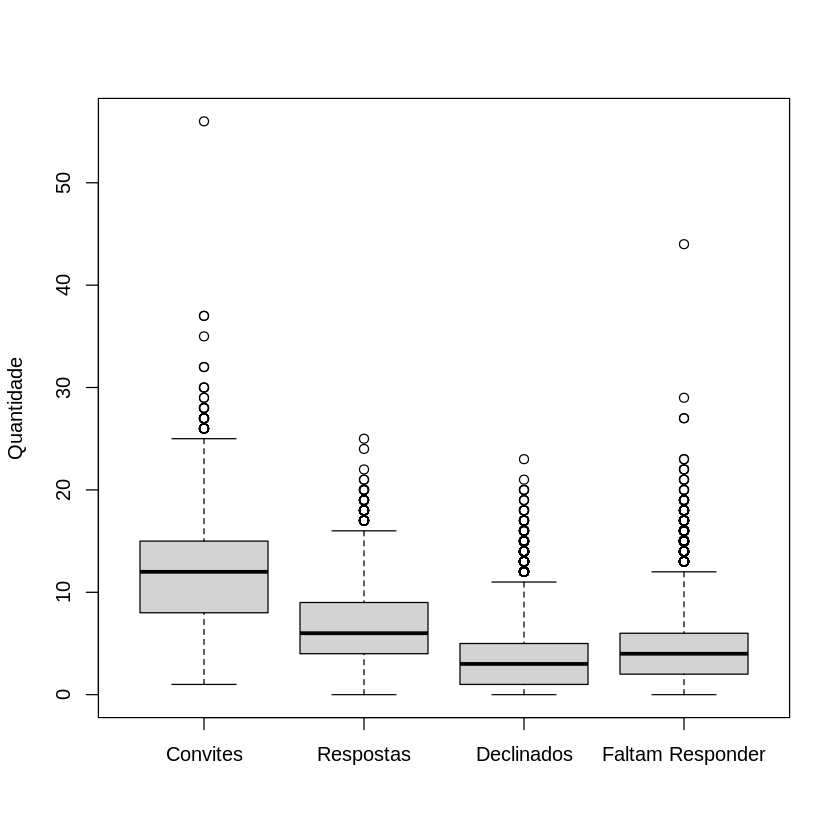

In [22]:
# Criando o boxplot - Conseguimos ter uma idéia do comportamento das variaveis.
boxplot(churn$Convites, churn$Respostas, churn$Declinadas, churn$Faltam_Responder,
        names = c("Convites", "Respostas", "Declinados", "Faltam Responder"),
        ylab = "Quantidade")


# Nessa etapa eu vou aplicar um teste muito comum na regressão logística:

*Teste de significância global do modelo: Esse teste verifica se o modelo como um todo é significativo. O teste mais comum é o teste de qui-quadrado, que compara a deviance do modelo ajustado com a deviance de um modelo nulo.*

*Antes disso, precisamos criar uma variavel do tipo binaria na nossa base de dados. Vamos utilizar a variavel dias em atraso. Caso o cliente tenha mais de 180 dias sem cotação, esse cliente sera tratado como churn. 180 dias, para esse negócio em especifico, já mostra que o cliente não está mais engajado com o produto, essa informação é de outras pesquisas internas feitas pela companhia.*



# Remover algumas variaveis que não iremos mais utilizar:
*Foram removidas:  cliente, Data_cotacao e Data_hoje churn.
Eu poderia criar um outro datasets sem essas variaveis, mas eu preferi remover.*

In [37]:
#Removendo variaveis
churn$Data_cotacao <- NULL
churn$Data_hoje <- NULL
churn$Cliente <- NULL


In [ ]:
churn$churn_0_1 <- ifelse(churn$Dias_sem_Cotacao >= 180, 1, 0)
churn

In [28]:
contagem <- table(churn$churn_0_1)
contagem


    0     1 
33304 89562 

# Vamos montar um modelo simples de Regressão logística.

In [54]:
# Ajuste do modelo de regressão logística
modelo <- glm(churn_0_1 ~ Respostas + Declinadas + Faltam_Responder, data = churn, family = binomial)

# Sumário do modelo
summary(modelo)



Call:
glm(formula = churn_0_1 ~ Respostas + Declinadas + Faltam_Responder, 
    family = binomial, data = churn)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.529886   0.019098  27.746   <2e-16 ***
Respostas        -0.002102   0.002769  -0.759    0.448    
Declinadas       -0.126627   0.003185 -39.759   <2e-16 ***
Faltam_Responder  0.225740   0.002684  84.106   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 143584  on 122865  degrees of freedom
Residual deviance: 131947  on 122862  degrees of freedom
AIC: 131955

Number of Fisher Scoring iterations: 4


# No modelo de regressão logística ajustado, os resultados dos coeficientes são os seguintes:

* Intercepto (Intercept): O coeficiente estimado é 0.529886, o que indica o valor esperado do log da razão de chances (log odds) de 'churn_0_1' quando todas as outras variáveis independentes são zero.

* Respostas (Respostas): O coeficiente estimado é -0.002102, e seu valor-p é 0.448. Isso indica que a variável 'Respostas' não apresenta uma influência estatisticamente significativa na probabilidade de ocorrência de 'churn_0_1'. Um valor-p maior que o nível de significância usual (0,05) sugere que não há evidências suficientes para rejeitar a hipótese nula de que não há associação entre 'Respostas' e 'churn_0_1'.

* Declinadas (Declinadas): O coeficiente estimado é -0.126627, e seu valor-p é menor que 2e-16. Isso indica que a variável 'Declinadas' tem uma influência significativa na probabilidade de ocorrência de 'churn_0_1'. Um coeficiente negativo sugere que um aumento em 'Declinadas' está associado a uma diminuição na probabilidade de churn.

* Faltam_Responder (Faltam_Responder): O coeficiente estimado é 0.225740, e seu valor-p é menor que 2e-16. Isso indica que a variável 'Faltam_Responder' também tem uma influência significativa na probabilidade de ocorrência de 'churn_0_1'. Um coeficiente positivo sugere que um aumento em 'Faltam_Responder' está associado a um aumento na probabilidade de churn.

In [69]:
# Calcular as previsões do modelo
predicoes <- predict(modelo, newdata = churn, type = "response")

In [70]:
# Converter as probabilidades para classes (0 ou 1)
classes_preditas <- ifelse(predicoes > 0.5, 1, 0)


In [71]:
# Calcular a taxa de acerto (accuracy)
taxa_acerto <- mean(classes_preditas == churn$churn_0_1)
taxa_acerto

[1] 0.7421581

In [78]:
# Converter as probabilidades em classes binárias
classes_preditas <- ifelse(predicoes > 0.5, 1, 0)
churn$churn_0_1 <- as.factor(churn$churn_0_1)

# Criar a matriz de confusão manualmente
matriz_confusao <- table(classes_preditas, churn$churn_0_1)

# Exibir a matriz de confusão
print(matriz_confusao)


                
classes_preditas     0     1
               0  4154  2530
               1 29150 87032


# Conclusão
*No geral, o modelo de regressão logística indica que as variáveis "Declinadas" e "Faltam_Responder" têm uma influência significativa na variável "churn_0_1". A direção e magnitude dos coeficientes fornecem insights sobre como essas variáveis estão relacionadas ao churn. Calculamos a acuracia do modelo que ficou em 74%, pode-se considerar que há alta precisão dos resultados e baixo risco de erro, o que traz mais segurança para a tomada de decisão.*